In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import missingno as msno
import xgboost as xgb

import numpy as np
import pandas as pd

import seaborn as sns

from scipy.stats import spearmanr

%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df_vectors = pd.read_csv('Africa_Vectors_database_1898_2016.csv', encoding = "ISO-8859-1")
df_amf = pd.read_csv('amf_distributions.csv', encoding = "ISO-8859-1")
df_estimate_cases = pd.read_csv('estimate_cases.csv', encoding = "ISO-8859-1")
df_estimated_deaths = pd.read_csv('estimated_deaths.csv', encoding = "ISO-8859-1")
df_insecticide_resistance = pd.read_csv('insecticide_resistance.csv', encoding = "ISO-8859-1")
df_population_stat = pd.read_csv('population_stats.csv', encoding = "ISO-8859-1")
df_reported_deaths = pd.read_csv('reported_deaths.csv', encoding = "ISO-8859-1")
df_reported_cases = pd.read_csv('reported_indigenous_confirmed_cases.csv', encoding = "ISO-8859-1")
df_treatments_prevention = pd.read_csv('treatments_prevention.csv', encoding = "ISO-8859-1")

In [3]:
df_vectors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 41 columns):
Country                                   13464 non-null object
GAUL_Admin1                               13364 non-null object
GAUL_Admin2                               13075 non-null object
Full_Name                                 13464 non-null object
Lat                                       13330 non-null float64
Long                                      13330 non-null float64
LatLong_Source                            13331 non-null object
YeStart                                   13464 non-null int64
YeEnd                                     13464 non-null int64
An gambiae_complex                        11596 non-null object
An gambiae ss                             3990 non-null object
SS M Form (An colluzzi or Mopti forms)    1331 non-null object
SS S Form (savanah or Bamako forms)       1575 non-null object
An arabiensis                             3648 non-null object

In [4]:
df_vectors.head()

,Country,GAUL_Admin1,GAUL_Admin2,Full_Name,Lat,Long,LatLong_Source,YeStart,YeEnd,An gambiae_complex,...,An rufipes,An coustani s.l,An ziemanni,An paludis,Adults/Larvae,Sampling_Methods,Species_Identification,Other sib species names,Other Anopheline species,Source_Title
0,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","HLC, HBC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
1,Angola,Bengo,Dande,Boa Vista,-8.5990,13.5660,Encarta,1987,1987,Y,...,NaN,NaN,NaN,NaN,"Adults, Larvae","PSC, LC",M,NaN,NaN,Ramos L (1988). Memorandum sent to Director Ge...
2,Angola,Bengo,Dande,Cabungo,-8.5667,13.5000,Other,2002,2002,Y,...,NaN,NaN,NaN,NaN,Adults,"IR, Bednet traps","M, PCR",NaN,NaN,"Calzetta M, Santolamazza F, Carrara GC, Cani P..."
3,Angola,Bengo,Dande,Lifune,-8.4000,13.4490,Encarta,1970,1970,NaN,...,NaN,Y,Y,NaN,"Adults, Larvae","HLC, ABC, LC",M,NaN,NaN,Ribeiro H & Ramos HC (1975). Research on the m...
4,Angola,Bengo,Dembos,Dembos,-8.5156,14.5189,Google Earth,1940,1940,Y,...,NaN,NaN,NaN,NaN,Unknown,Unknown,M,NaN,NaN,De Mesquita B (1942). Consideraes sobre o im...


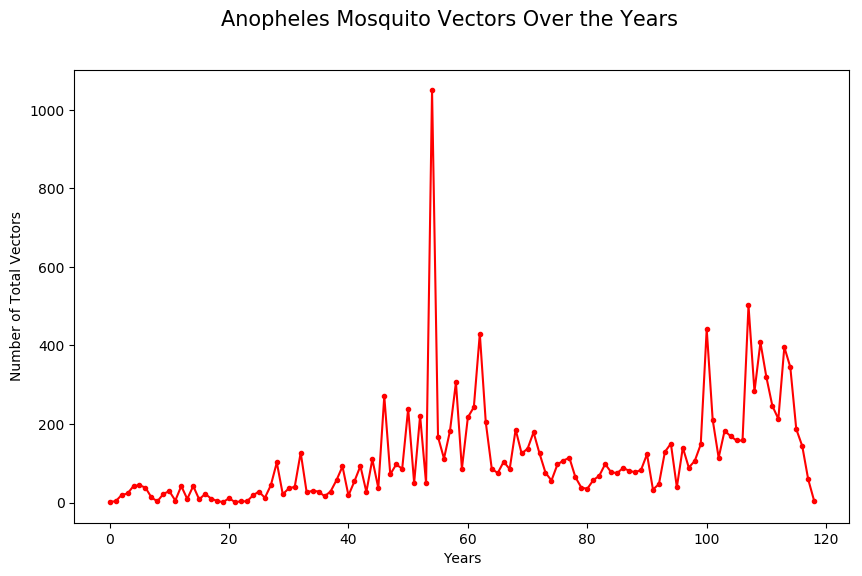

In [31]:

vectors_year = df_vectors.groupby(df_vectors.YeStart)['Country'].count().reset_index()

fig= plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('Anopheles Mosquito Vectors Over the Years', fontsize=15, label ='Accident')
plt.plot(vectors_year.YeStart.index,vectors_year.Country, marker ='.', color = 'red')
plt.xlabel ("Years")
plt.ylabel ("Number of Total Vectors")


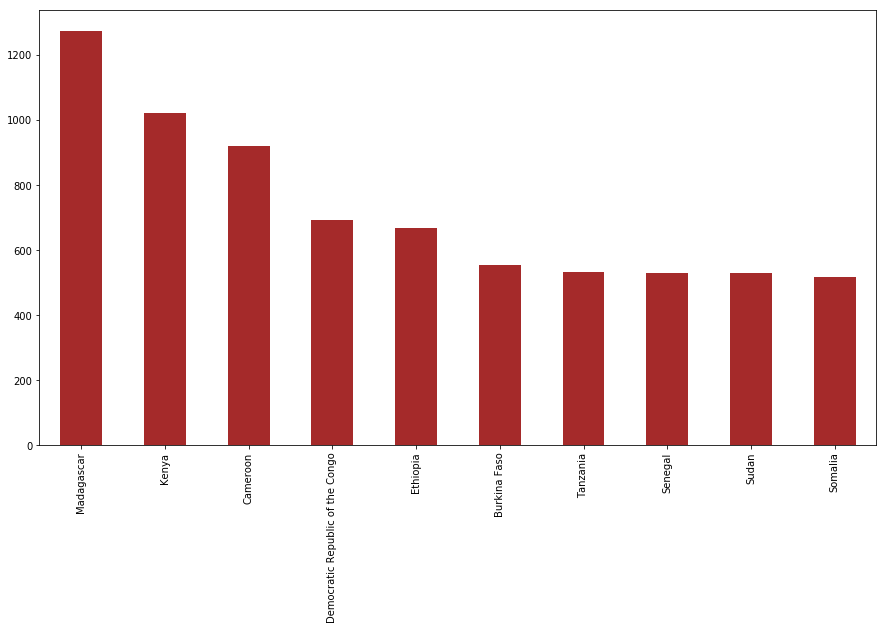

In [39]:
plt.figure(figsize=(15,8))
df_vectors['Country'].value_counts().nlargest(10).plot(kind = 'bar', color = 'brown')

In [104]:
df_M1

,YeStart,Country
0,1902,4
1,1903,24
2,1904,28
3,1910,1
4,1930,4
5,1942,10
6,1945,1
7,1952,937
8,1958,1
9,1959,2


In [51]:
vectors_year.head()

,YeStart,Country
0,1898,2
1,1899,3
2,1900,19
3,1901,23
4,1902,42


In [9]:
df_amf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
#_llins         167 non-null int64
location        167 non-null object
country         167 non-null object
when            167 non-null object
by_whom         167 non-null object
country_code    163 non-null object
dtypes: int64(1), object(5)
memory usage: 7.9+ KB


In [45]:
df_amf

,#_llins,location,country,when,by_whom,country_code
0,3000,Mombasa/Siaya,Kenya,May-Jun 06,Red Cross,KEN
1,3000,Blan/Mch/Nkh/Nkh,Malawi,May-Jun 06,Red Cross,MWI
2,3000,Capr/Kava/Ohang,Namibia,May-Jun 06,Red Cross,NAM
3,2000,Kigali,Rwanda,May-Jun 06,Red Cross,RWA
4,2000,Soroti,Uganda,May-Jun 06,Red Cross,UGA
5,3000,Livingstone,Zambia,May-Jun 06,Red Cross,ZMB
6,3000,Victoria Falls/Mount Darwin,Zimbabwe,May-Jun 06,Red Cross,ZWE
7,10000,Gatumba,Burundi,Mar 07,UNICEF,BDI
8,10450,Angola,Angola,Jan-Feb 07,UNICEF,AGO
9,8500,Mentawai,Indonesia,Jan-Feb 07,SurfAid,IDN


In [11]:
df_estimate_cases.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,MALARIA002,Estimated number of malaria cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,AMR,Americas,NaN,CRI,Costa Rica,NaN,<10,2.0,NaN,NaN,NaN
1,MALARIA002,Estimated number of malaria cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,AMR,Americas,NaN,SLV,El Salvador,NaN,<10,7.0,NaN,NaN,NaN
2,MALARIA002,Estimated number of malaria cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,EUR,Europe,NaN,TJK,Tajikistan,NaN,<10,8.0,NaN,NaN,NaN
3,MALARIA002,Estimated number of malaria cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,AFR,Africa,NaN,DZA,Algeria,NaN,<50,25.0,NaN,NaN,NaN
4,MALARIA002,Estimated number of malaria cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,SEAR,South-East Asia,NaN,BTN,Bhutan,NaN,<50,25.0,NaN,NaN,NaN


In [12]:
df_estimated_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 20 columns):
GHO (CODE)                416 non-null object
GHO (DISPLAY)             416 non-null object
GHO (URL)                 416 non-null object
PUBLISHSTATE (CODE)       416 non-null object
PUBLISHSTATE (DISPLAY)    416 non-null object
PUBLISHSTATE (URL)        0 non-null float64
YEAR (CODE)               416 non-null int64
YEAR (DISPLAY)            416 non-null int64
YEAR (URL)                0 non-null float64
REGION (CODE)             416 non-null object
REGION (DISPLAY)          416 non-null object
REGION (URL)              0 non-null float64
COUNTRY (CODE)            416 non-null object
COUNTRY (DISPLAY)         416 non-null object
COUNTRY (URL)             0 non-null float64
Display Value             416 non-null object
Numeric                   404 non-null float64
Low                       404 non-null float64
High                      396 non-null float64
Comments                

In [13]:
df_estimated_deaths.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,MALARIA003,Estimated number of malaria deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2000,2000,NaN,EMR,Eastern Mediterranean,NaN,AFG,Afghanistan,NaN,720 [250-1 500],720.0,250.0,1500.0,NaN
1,MALARIA003,Estimated number of malaria deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2005,2005,NaN,EMR,Eastern Mediterranean,NaN,AFG,Afghanistan,NaN,380 [130-770],380.0,130.0,770.0,NaN
2,MALARIA003,Estimated number of malaria deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2010,2010,NaN,EMR,Eastern Mediterranean,NaN,AFG,Afghanistan,NaN,260 [79-510],260.0,79.0,510.0,NaN
3,MALARIA003,Estimated number of malaria deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,EMR,Eastern Mediterranean,NaN,AFG,Afghanistan,NaN,120 [46-210],120.0,46.0,210.0,NaN
4,MALARIA003,Estimated number of malaria deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2000,2000,NaN,AFR,Africa,NaN,AGO,Angola,NaN,22 000 [17 000-28 000],22000.0,17000.0,28000.0,NaN


In [14]:
df_insecticide_resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 20 columns):
GHO (CODE)                6180 non-null object
GHO (DISPLAY)             6180 non-null object
GHO (URL)                 6180 non-null object
PUBLISHSTATE (CODE)       6180 non-null object
PUBLISHSTATE (DISPLAY)    6180 non-null object
PUBLISHSTATE (URL)        0 non-null float64
YEAR (CODE)               6180 non-null int64
YEAR (DISPLAY)            6180 non-null int64
YEAR (URL)                0 non-null float64
REGION (CODE)             6180 non-null object
REGION (DISPLAY)          6180 non-null object
REGION (URL)              0 non-null float64
COUNTRY (CODE)            6180 non-null object
COUNTRY (DISPLAY)         6180 non-null object
COUNTRY (URL)             0 non-null float64
Display Value             6180 non-null object
Numeric                   0 non-null float64
Low                       0 non-null float64
High                      0 non-null float64
Comments        

In [15]:
df_insecticide_resistance.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,SEAR,South-East Asia,NaN,BGD,Bangladesh,NaN,Yes,NaN,NaN,NaN,NaN
1,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,AFR,Africa,NaN,BEN,Benin,NaN,Yes,NaN,NaN,NaN,NaN
2,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2011,2011,NaN,AFR,Africa,NaN,GHA,Ghana,NaN,Yes,NaN,NaN,NaN,NaN
3,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2009,2009,NaN,AFR,Africa,NaN,KEN,Kenya,NaN,Yes,NaN,NaN,NaN,NaN
4,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2009,2009,NaN,AFR,Africa,NaN,TGO,Togo,NaN,Yes,NaN,NaN,NaN,NaN


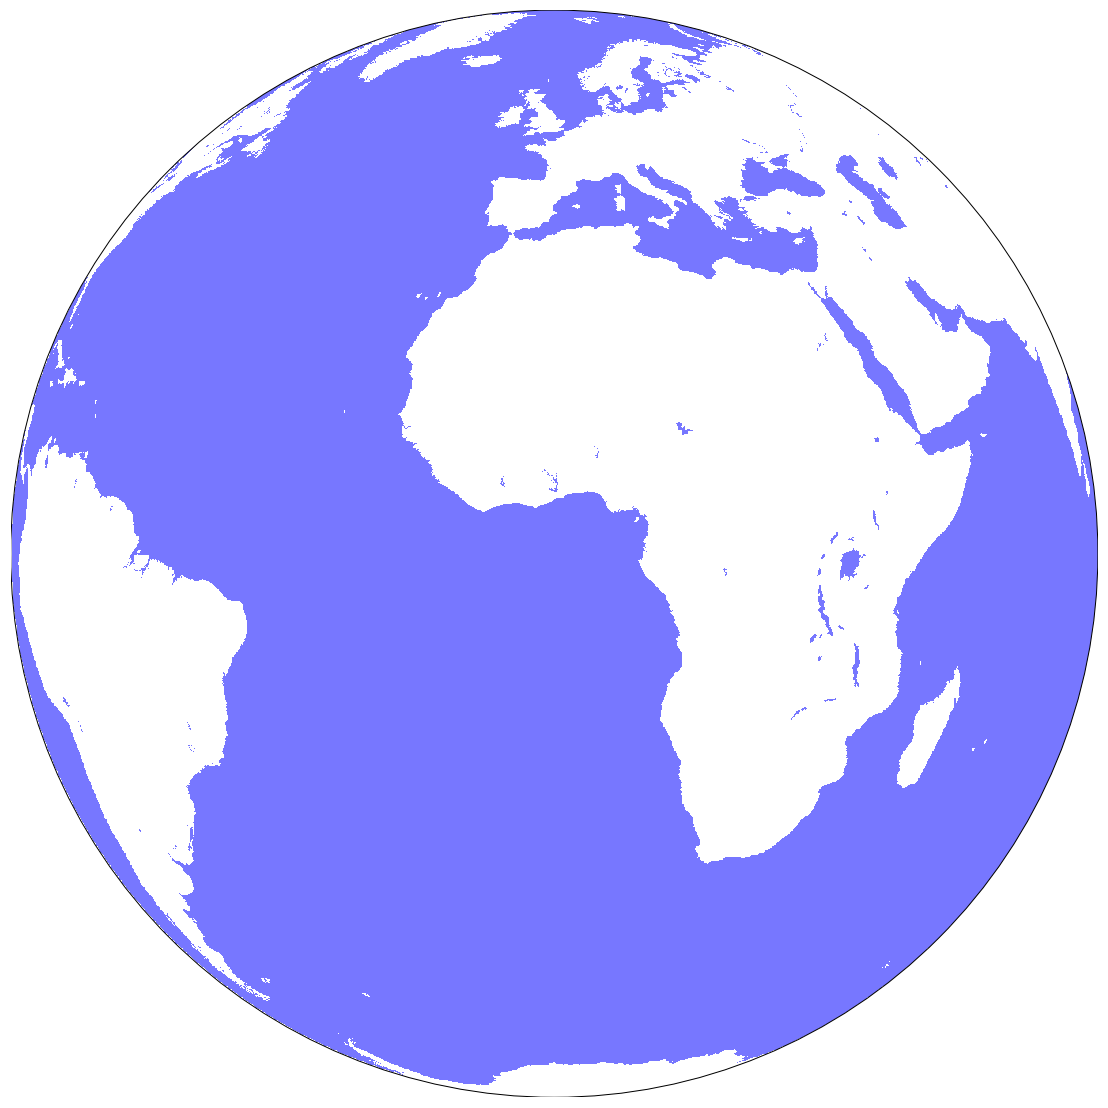

In [26]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawlsmask(land_color = "white", 
               ocean_color="#7777ff",
               resolution = 'l')

plt.show()


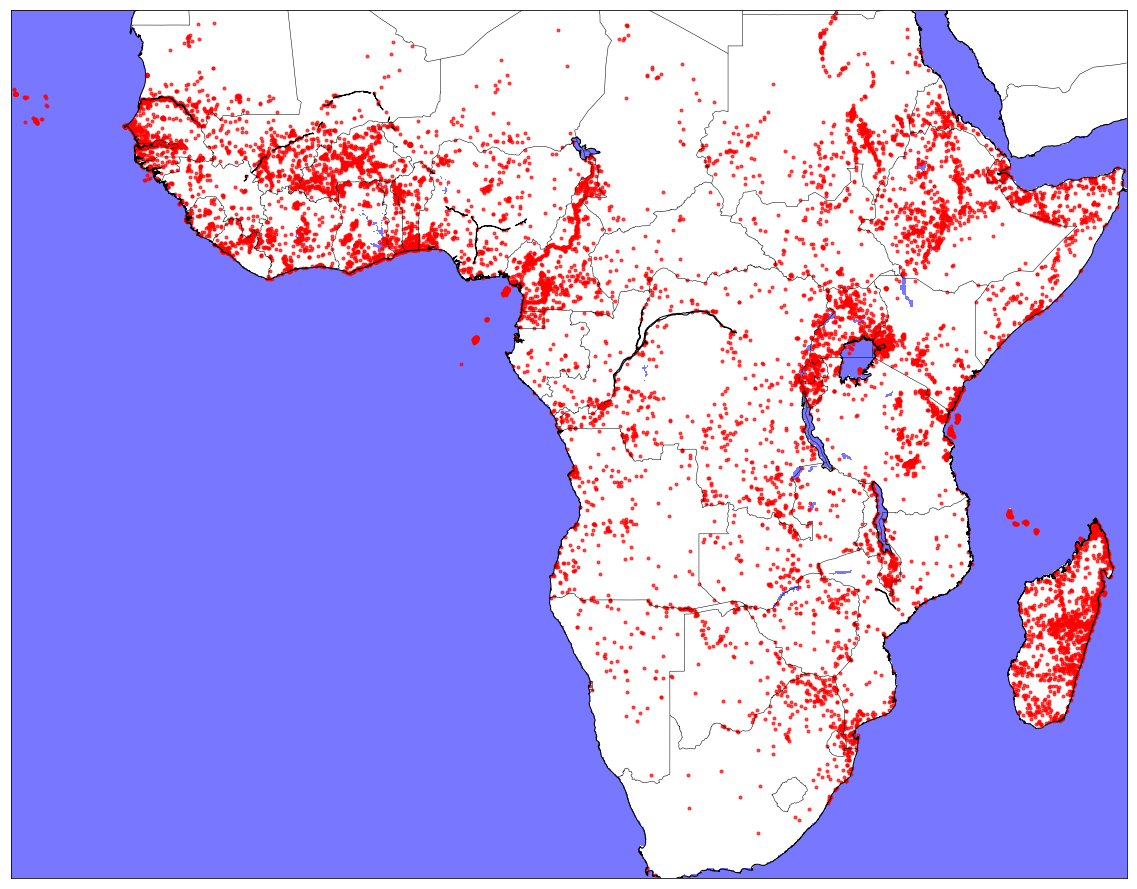

In [25]:
plt.figure(figsize=(20,20))

lat = df_vectors['Lat'].values
long = df_vectors['Long'].values

# determine range to print based on min, max lat and long of the data
margin = .2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
long_min = min(long) - margin
long_max = max(long) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawlsmask(land_color = "white", 
               ocean_color="#7777ff",
               resolution = 'l')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
lons, lats = m(long, lat)
# plot points as red dots
m.scatter(lons, lats, marker = '.', color = 'red',alpha=0.7)

plt.show()

In [29]:
df_insecticide_resistance.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,SEAR,South-East Asia,NaN,BGD,Bangladesh,NaN,Yes,NaN,NaN,NaN,NaN
1,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,AFR,Africa,NaN,BEN,Benin,NaN,Yes,NaN,NaN,NaN,NaN
2,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2011,2011,NaN,AFR,Africa,NaN,GHA,Ghana,NaN,Yes,NaN,NaN,NaN,NaN
3,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2009,2009,NaN,AFR,Africa,NaN,KEN,Kenya,NaN,Yes,NaN,NaN,NaN,NaN
4,IR_PYRETHROID_PRESENCE,Pyrethroid resistance reported for at least on...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2009,2009,NaN,AFR,Africa,NaN,TGO,Togo,NaN,Yes,NaN,NaN,NaN,NaN


In [30]:
df_insecticide_resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 20 columns):
GHO (CODE)                6180 non-null object
GHO (DISPLAY)             6180 non-null object
GHO (URL)                 6180 non-null object
PUBLISHSTATE (CODE)       6180 non-null object
PUBLISHSTATE (DISPLAY)    6180 non-null object
PUBLISHSTATE (URL)        0 non-null float64
YEAR (CODE)               6180 non-null int64
YEAR (DISPLAY)            6180 non-null int64
YEAR (URL)                0 non-null float64
REGION (CODE)             6180 non-null object
REGION (DISPLAY)          6180 non-null object
REGION (URL)              0 non-null float64
COUNTRY (CODE)            6180 non-null object
COUNTRY (DISPLAY)         6180 non-null object
COUNTRY (URL)             0 non-null float64
Display Value             6180 non-null object
Numeric                   0 non-null float64
Low                       0 non-null float64
High                      0 non-null float64
Comments        

In [31]:
df_population_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17714 entries, 0 to 17713
Data columns (total 23 columns):
GHO (CODE)                        17714 non-null object
GHO (DISPLAY)                     17714 non-null object
GHO (URL)                         17714 non-null object
PUBLISHSTATE (CODE)               17714 non-null object
PUBLISHSTATE (DISPLAY)            17714 non-null object
PUBLISHSTATE (URL)                0 non-null float64
YEAR (CODE)                       17714 non-null object
YEAR (DISPLAY)                    17714 non-null object
YEAR (URL)                        0 non-null float64
REGION (CODE)                     17714 non-null object
REGION (DISPLAY)                  17714 non-null object
REGION (URL)                      0 non-null float64
WORLDBANKINCOMEGROUP (CODE)       15247 non-null object
WORLDBANKINCOMEGROUP (DISPLAY)    15247 non-null object
WORLDBANKINCOMEGROUP (URL)        0 non-null float64
COUNTRY (CODE)                    17714 non-null object
COUNTRY

In [34]:
df_population_stat.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,WORLDBANKINCOMEGROUP (DISPLAY),WORLDBANKINCOMEGROUP (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,WHS9_88,Population median age (years),http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,EUR,...,NaN,NaN,ALB,Albania,NaN,32.56,32.56,NaN,NaN,NaN
1,WHS9_88,Population median age (years),http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,AFR,...,NaN,NaN,AGO,Angola,NaN,16.18,16.18,NaN,NaN,NaN
2,WHS9_88,Population median age (years),http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,SEAR,...,NaN,NaN,BTN,Bhutan,NaN,25.29,25.29,NaN,NaN,NaN
3,WHS9_88,Population median age (years),http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,EUR,...,NaN,NaN,BIH,Bosnia and Herzegovina,NaN,39.23,39.23,NaN,NaN,NaN
4,WHS9_88,Population median age (years),http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,AMR,...,NaN,NaN,COL,Colombia,NaN,27.4,27.40,NaN,NaN,NaN


In [35]:
df_reported_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
GHO (CODE)                1408 non-null object
GHO (DISPLAY)             1408 non-null object
GHO (URL)                 1408 non-null object
PUBLISHSTATE (CODE)       1408 non-null object
PUBLISHSTATE (DISPLAY)    1408 non-null object
PUBLISHSTATE (URL)        0 non-null float64
YEAR (CODE)               1408 non-null int64
YEAR (DISPLAY)            1408 non-null int64
YEAR (URL)                0 non-null float64
REGION (CODE)             1408 non-null object
REGION (DISPLAY)          1408 non-null object
REGION (URL)              0 non-null float64
COUNTRY (CODE)            1408 non-null object
COUNTRY (DISPLAY)         1408 non-null object
COUNTRY (URL)             0 non-null float64
Display Value             1408 non-null object
Numeric                   1408 non-null float64
Low                       0 non-null float64
High                      0 non-null float64
Comments     

In [77]:
df_reported_deaths.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,MALARIA001,Malaria - number of reported deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2008,2008,NaN,AFR,Africa,NaN,DZA,Algeria,NaN,0,0.0,NaN,NaN,NaN
1,MALARIA001,Malaria - number of reported deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,AFR,Africa,NaN,DZA,Algeria,NaN,0,0.0,NaN,NaN,NaN
2,MALARIA001,Malaria - number of reported deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2014,2014,NaN,AFR,Africa,NaN,DZA,Algeria,NaN,0,0.0,NaN,NaN,NaN
3,MALARIA001,Malaria - number of reported deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2001,2001,NaN,AFR,Africa,NaN,CPV,Cabo Verde,NaN,0,0.0,NaN,NaN,NaN
4,MALARIA001,Malaria - number of reported deaths,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,AFR,Africa,NaN,CPV,Cabo Verde,NaN,0,0.0,NaN,NaN,NaN


In [40]:
df_reported_deaths = df_reported_deaths.rename(columns={'COUNTRY (DISPLAY)': 'Country'})
df_vectors_death = pd.merge(df_vectors, df_reported_deaths, on = 'Country')
df_vectors_death = df_vectors_death.drop_duplicates()


In [41]:
a = df_reported_deaths(df_reported_deaths.Country)['GHO (CODE)'].count().reset_index()

TypeError: 'DataFrame' object is not callable

In [87]:
df_1 = df_vectors_death[['Country', 'Display Value']].groupby['Country'].sum().reset_index()

TypeError: 'method' object is not subscriptable

In [42]:
df_vectors_death

,Country,GAUL_Admin1,GAUL_Admin2,Full_Name,Lat,Long,LatLong_Source,YeStart,YeEnd,An gambiae_complex,...,REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,10 220,10220.0,NaN,NaN,NaN
1,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,10 530,10530.0,NaN,NaN,NaN
2,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,12 459,12459.0,NaN,NaN,NaN
3,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,13 768,13768.0,NaN,NaN,NaN
4,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,14 434,14434.0,NaN,NaN,NaN
5,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,38 598,38598.0,NaN,NaN,NaN
6,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,5 714,5714.0,NaN,NaN,NaN
7,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,5 736,5736.0,NaN,NaN,NaN
8,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,6 909,6909.0,NaN,NaN,NaN
9,Angola,Bengo,Dande,Barra do Dande,-8.4730,13.3620,Encarta,1967,1967,Y,...,AFR,Africa,NaN,AGO,NaN,7 300,7300.0,NaN,NaN,NaN


In [41]:
df_reported_cases.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,WHS3_48,Malaria - number of reported confirmed cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2001,2001,NaN,EMR,Eastern Mediterranean,NaN,EGY,Egypt,NaN,0,0.0,NaN,NaN,NaN
1,WHS3_48,Malaria - number of reported confirmed cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2003,2003,NaN,EMR,Eastern Mediterranean,NaN,EGY,Egypt,NaN,0,0.0,NaN,NaN,NaN
2,WHS3_48,Malaria - number of reported confirmed cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2013,2013,NaN,EMR,Eastern Mediterranean,NaN,IRQ,Iraq,NaN,0,0.0,NaN,NaN,NaN
3,WHS3_48,Malaria - number of reported confirmed cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2004,2004,NaN,EMR,Eastern Mediterranean,NaN,OMN,Oman,NaN,0,0.0,NaN,NaN,NaN
4,WHS3_48,Malaria - number of reported confirmed cases,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2012,2012,NaN,EMR,Eastern Mediterranean,NaN,SYR,Syrian Arab Republic,NaN,0,0.0,NaN,NaN,NaN


In [43]:
df_treatments_prevention.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),REGION (DISPLAY),REGION (URL),COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,Comments
0,MDG_0000000013,Children aged <5 years sleeping under insectic...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2008,2008,NaN,AFR,Africa,NaN,ZMB,Zambia,NaN,41.0,41.0,NaN,NaN,NaN
1,MDG_0000000014,Children aged <5 years with fever who received...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2007-2013,2007-2013,NaN,EMR,Eastern Mediterranean,NaN,DJI,Djibouti,NaN,1,1.0,NaN,NaN,NaN
2,MDG_0000000013,Children aged <5 years sleeping under insectic...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2000,2000,NaN,AFR,Africa,NaN,RWA,Rwanda,NaN,5.0,5.0,NaN,NaN,NaN
3,MDG_0000000013,Children aged <5 years sleeping under insectic...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2000,2000,NaN,AFR,Africa,NaN,COM,Comoros,NaN,9.0,9.0,NaN,NaN,NaN
4,MDG_0000000013,Children aged <5 years sleeping under insectic...,http://apps.who.int/gho/indicatorregistry/App_...,PUBLISHED,Published,NaN,2000,2000,NaN,AFR,Africa,NaN,GMB,Gambia,NaN,15.0,15.0,NaN,NaN,NaN


In [44]:
df_treatments_prevention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 20 columns):
GHO (CODE)                286 non-null object
GHO (DISPLAY)             286 non-null object
GHO (URL)                 286 non-null object
PUBLISHSTATE (CODE)       286 non-null object
PUBLISHSTATE (DISPLAY)    286 non-null object
PUBLISHSTATE (URL)        0 non-null float64
YEAR (CODE)               286 non-null object
YEAR (DISPLAY)            286 non-null object
YEAR (URL)                0 non-null float64
REGION (CODE)             286 non-null object
REGION (DISPLAY)          286 non-null object
REGION (URL)              0 non-null float64
COUNTRY (CODE)            286 non-null object
COUNTRY (DISPLAY)         286 non-null object
COUNTRY (URL)             0 non-null float64
Display Value             286 non-null object
Numeric                   286 non-null float64
Low                       96 non-null float64
High                      96 non-null float64
Comments                

In [32]:
vectors_year

,YeStart,Country
0,1898,2
1,1899,3
2,1900,19
3,1901,23
4,1902,42
5,1903,44
6,1904,38
7,1905,13
8,1906,3
9,1907,22
